In [2]:
!pip install datasets
!pip install retina-face
!pip install tf-keras
!pip install matplotlib

  Using cached datasets-3.2.0-py3-none-any.whl.metadata (20 kB)
  Using cached filelock-3.16.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached pyarrow-19.0.0-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (3.3 kB)
  Using cached dill-0.3.8-py3-none-any.whl.metadata (10 kB)
  Using cached pandas-2.2.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (89 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached xxhash-3.5.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (12 kB)
  Using cached multiprocess-0.70.16-py311-none-any.whl.metadata (7.2 kB)
  Using cached fsspec-2024.9.0-py3-none-any.whl.metadata (11 kB)
  Using cached aiohttp-3.11.11-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (7.7 kB)
  Using cached huggingface_hub-0.27.1-py3-none-any.whl.metadata (13 kB)
  Using cached aiohappyeyeballs-2.4.4-py3-none-any.whl.metadata (6.1 kB)
  Using cached aiosignal-1.3.2-py2.py3-none-any.whl.metadata (3.

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import random
from datasets import load_dataset
import matplotlib.patches as patches
from retinaface import RetinaFace

In [4]:
# Dataset initialisation
dataset = load_dataset("cuhk-cse/wider_face", trust_remote_code=True)

/common/home/users/n/nicoleoo.2021/jupyterlab-venv-tf-217/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


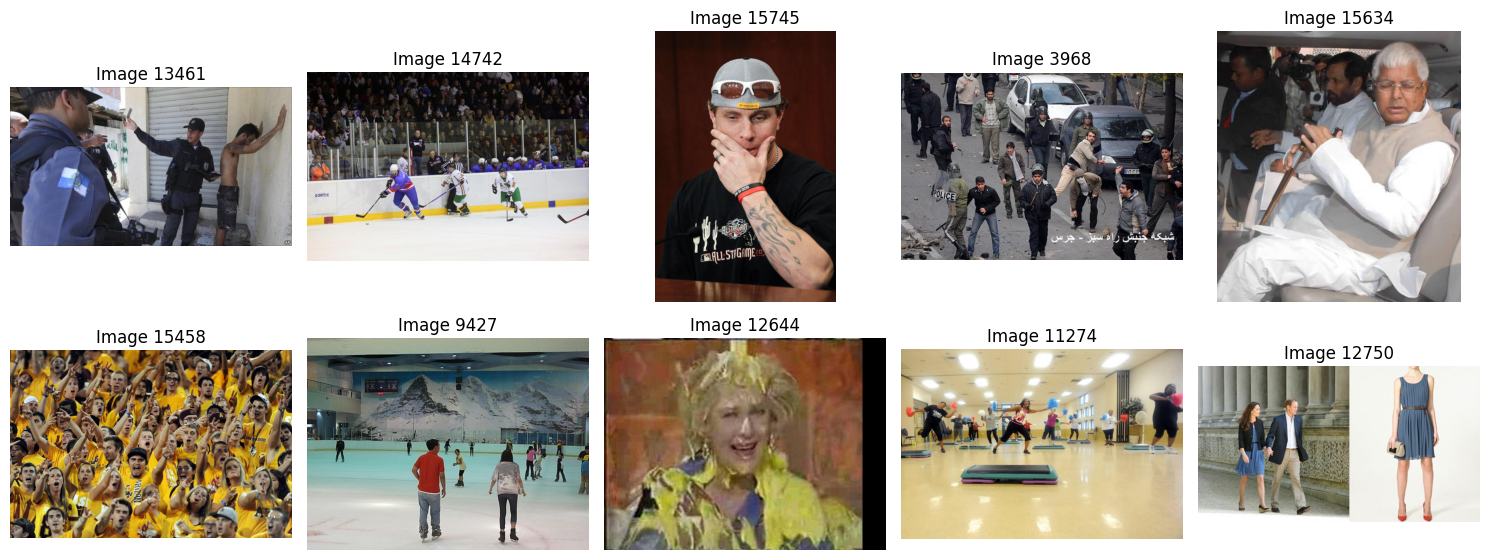

In [9]:
# Access the test set
test_set = dataset["test"]

# Randomly select 10 indices from the test set
random_indices = random.sample(range(len(test_set)), 10)

# Plot 10 randomly selected images
fig, axes = plt.subplots(2, 5, figsize=(15, 6))  # 2 rows, 5 columns
axes = axes.flatten()  # Flatten axes for easy iteration

for i, idx in enumerate(random_indices):
    # Get the image from the dataset
    test_img = test_set[idx]["image"]
    
    # Display the image in the subplot
    axes[i].imshow(test_img)
    axes[i].axis("off")
    axes[i].set_title(f"Image {idx}")

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [8]:
# Check output for one image
image_np = np.array(test_img)
image_np = image_np.astype(np.float32)
resp = RetinaFace.detect_faces(image_np)
print(resp)

{'face_1': {'score': np.float64(0.9995123744010925), 'facial_area': [np.int64(874), np.int64(189), np.int64(892), np.int64(212)], 'landmarks': {'right_eye': [np.float32(876.90326), np.float32(198.2119)], 'left_eye': [np.float32(882.53815), np.float32(198.9372)], 'nose': [np.float32(876.54755), np.float32(202.59534)], 'mouth_right': [np.float32(876.45154), np.float32(207.17632)], 'mouth_left': [np.float32(880.66223), np.float32(207.54623)]}}, 'face_2': {'score': np.float64(0.9994102716445923), 'facial_area': [np.int64(950), np.int64(185), np.int64(968), np.int64(208)], 'landmarks': {'right_eye': [np.float32(952.7737), np.float32(192.7053)], 'left_eye': [np.float32(960.314), np.float32(193.64322)], 'nose': [np.float32(953.71906), np.float32(197.48964)], 'mouth_right': [np.float32(952.2144), np.float32(202.19873)], 'mouth_left': [np.float32(957.8102), np.float32(202.78374)]}}, 'face_3': {'score': np.float64(0.9987093806266785), 'facial_area': [np.int64(832), np.int64(136), np.int64(848), 

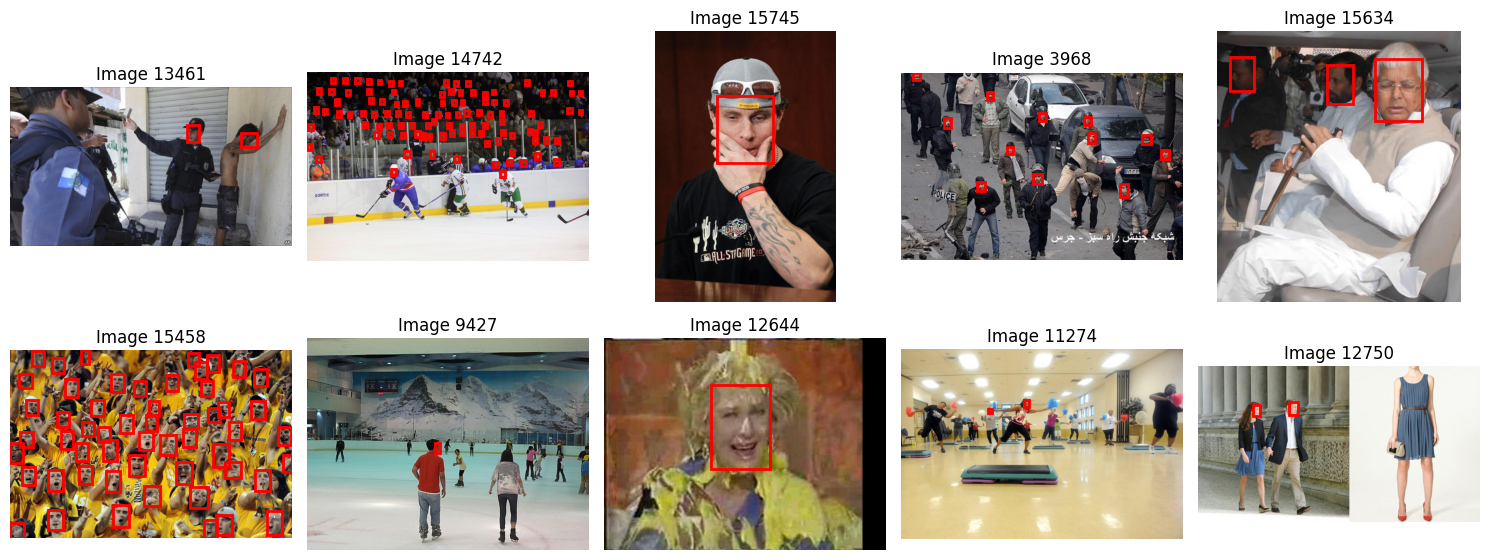

In [11]:
# View predictions for the randomly selected images
# Plot 10 randomly selected images with predictions
fig, axes = plt.subplots(2, 5, figsize=(15, 6))  # 2 rows, 5 columns
axes = axes.flatten()  # Flatten axes for easy iteration

for i, idx in enumerate(random_indices):
    # Get the image from the dataset
    test_img = test_set[idx]["image"]
    
    # Convert the image to a NumPy array
    image_np = np.array(test_img)
    image_np = image_np.astype(np.float32)  # Ensure it's float32

    # Get predictions from RetinaFace
    resp = RetinaFace.detect_faces(image_np)
    
    # Display the image
    axes[i].imshow(test_img)
    axes[i].axis("off")
    axes[i].set_title(f"Image {idx}")
    
    # Plot the bounding boxes
    if resp:
        for face_key in resp:
            face = resp[face_key]
            bbox = face['facial_area']  # Bounding box: [xmin, ymin, xmax, ymax]
            x_min, y_min, x_max, y_max = bbox

            # Add rectangle to the plot
            rect = patches.Rectangle(
                (x_min, y_min), x_max - x_min, y_max - y_min,
                linewidth=2, edgecolor='r', facecolor='none'
            )
            axes[i].add_patch(rect)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()